In [1]:
import pandas as pd
import numpy as np
import sklearn
import os
import os.path as op

In [2]:
path = '../../data/kaggle-titanic'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
setNames = ['train_RescaleClean.csv','train_label.csv','test_RescaleClean.csv']
data = []
for sn in setNames:
    data.append( pd.read_csv(op.join(path,sn), index_col=0))
    print(data[-1].head())
    print(data[-1].info())

../../data/kaggle-titanic/train_label.csv
../../data/kaggle-titanic/test_RescaleClean.csv
../../data/kaggle-titanic/train_RescaleClean.csv
../../data/kaggle-titanic/test.csv
../../data/kaggle-titanic/submission.csv
../../data/kaggle-titanic/train.csv
../../data/kaggle-titanic/significantFeatures.txt
   Pclass  Sex  SibSp  Parch  Fare_group  Embarked  Age_group  Title
0     1.0  0.0  0.125    0.0         0.0       0.0        0.2    0.0
1     0.0  1.0  0.125    0.0         0.0       0.5        0.4    0.5
2     1.0  1.0  0.000    0.0         0.0       0.0        0.2    1.0
3     0.0  1.0  0.125    0.0         0.0       0.0        0.4    0.5
4     1.0  0.0  0.000    0.0         0.0       0.0        0.4    0.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    float64
 1   Sex         891 non-null    float64
 2   SibSp       

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import kstest

sigFeatures = []
X, y, X_test = data[0], data[1]['Survived'], data[2]
for col in X.columns:
    # Conducting two-sample ttest
    print(col)
    print('Ttest')
    t_value, p_value = stats.ttest_ind(X[col],X_test[col])
    print('t_value / p_value'  )
    print([t_value, p_value]  )
    
    print('Kolmogorov-Smirnoff Test')
    t_value, p_value = kstest(X[col],X_test[col])
    print('t_value / p_value'  )
    print([t_value, p_value]  )
    
    if p_value > 0.05:
        sigFeatures.append(col)
        
print(sigFeatures)
with open(op.join(path,"significantFeatures.txt"), "w") as output:
    for sf in sigFeatures:
        output.write(sf+'\n')

Pclass
Ttest
t_value / p_value
[0.8674631603325991, 0.38584752217739526]
Kolmogorov-Smirnoff Test
t_value / p_value
[0.0295351172544155, 0.9571654941014093]
Sex
Ttest
t_value / p_value
[-0.39509930956433004, 0.692834069156284]
Kolmogorov-Smirnoff Test
t_value / p_value
[0.01122334455667789, 0.9999999999993855]
SibSp
Ttest
t_value / p_value
[1.2250766361124175, 0.22076707764804074]
Kolmogorov-Smirnoff Test
t_value / p_value
[0.025311595487034082, 0.9905968490976705]
Parch
Ttest
t_value / p_value
[2.660755217388427, 0.007892024418301998]
Kolmogorov-Smirnoff Test
t_value / p_value
[0.13857877015771752, 3.11376030827093e-05]
Fare_group
Ttest
t_value / p_value
[-1.1525163493312045, 0.24931970409143328]
Kolmogorov-Smirnoff Test
t_value / p_value
[0.02061551184358202, 0.9995033588321123]
Embarked
Ttest
t_value / p_value
[-2.598211635368975, 0.009476445869056558]
Kolmogorov-Smirnoff Test
t_value / p_value
[0.07685037509598913, 0.06509628840998538]
Age_group
Ttest
t_value / p_value
[-2.15296360

<AxesSubplot:ylabel='Frequency'>

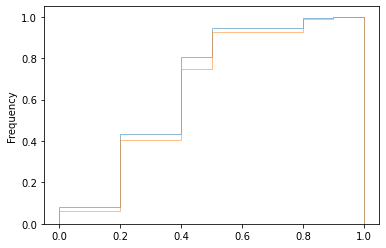

In [4]:
X['Age_group'].plot.hist(density=True,cumulative=True, alpha = 0.5, histtype='step')
X_test['Age_group'].plot.hist(density=True,cumulative=True, alpha = 0.5, histtype='step')

In [5]:
np.mean(X['Age_group'])

0.3485970819304132

In [6]:
np.mean(X_test['Age_group'])

0.3746411483253591

<AxesSubplot:ylabel='Frequency'>

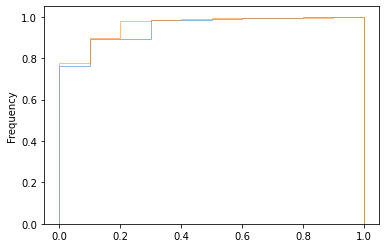

In [7]:
X['Parch'].plot.hist(density=True,cumulative=True, alpha = 0.5, histtype='step')
X_test['Parch'].plot.hist(density=True,cumulative=True, alpha = 0.5, histtype='step')

<AxesSubplot:ylabel='Frequency'>

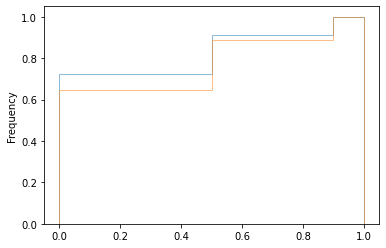

In [8]:
X['Embarked'].plot.hist(density=True,cumulative=True, alpha = 0.5, histtype='step')
X_test['Embarked'].plot.hist(density=True,cumulative=True, alpha = 0.5, histtype='step')